In [1]:
#Task 1.0

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import  GridSearchCV

warnings.filterwarnings('ignore')


In [2]:
#Task 1.1
#In prior EDA submission, I used Late_Payment column to spit the data evenly into 80/20

ModelCCLoan=pd.read_csv(r'.\DataCapstoneProject2\ccFraudDefault\trainfinal.csv',header=0)


In [3]:
#Task 1.2
ModelCCLoan.head()

,CLIENTID,LATE_PAYMENT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,402072,0,Cash loans,F,N,N,0,67500.0,191880.0,18976.5,180000.0,Unaccompanied,State servant,Secondary / secondary special,Civil marriage,Municipal apartment,0.004849,-15732,-9150,-6715.0,-4389,0.0,1,1,1,1,0,0,unknown,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Other,unknown,unknown,5.0,0.0,5.0,0.0,-2797.0,0.0,0.0
1,384853,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.072508,-15242,-2715,-4567.0,-5336,0.0,1,1,0,1,0,0,Laborers,1.0,1,1,SATURDAY,17,0,0,0,0,0,0,Business Entity Type 3,block of flats,Panel,8.0,0.0,8.0,0.0,-234.0,0.0,1.0
2,170510,0,Cash loans,F,Y,N,1,90000.0,900000.0,29034.0,900000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.031329,-13677,-2846,-3897.0,-4297,15.0,1,1,1,1,1,0,Secretaries,3.0,2,2,SATURDAY,16,0,0,0,0,0,0,Medicine,block of flats,Panel,0.0,0.0,0.0,0.0,-1836.0,0.0,0.0
3,186475,0,Cash loans,F,N,Y,0,69300.0,270000.0,11569.5,270000.0,Unaccompanied,Pensioner,Higher education,Married,House / apartment,0.028663,-19719,365243,-4206.0,-3257,0.0,1,0,0,1,0,0,unknown,2.0,2,2,THURSDAY,8,0,0,0,0,0,0,XNA,block of flats,Panel,0.0,0.0,0.0,0.0,-3046.0,0.0,0.0
4,392298,0,Cash loans,F,N,N,0,117000.0,1195461.0,35082.0,936000.0,Family,Pensioner,Secondary / secondary special,Married,Rented apartment,0.020713,-22492,365243,-919.0,-2497,0.0,1,0,0,1,0,0,unknown,2.0,3,2,THURSDAY,8,0,0,0,0,0,0,XNA,unknown,unknown,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [4]:
#Task 1.3.0
ModelCCLoan.shape

(230633, 50)

In [5]:
#Task 1.3.1
#got an error doing linear regression model
#dropping columns that are not float or numberic value 
ModelCCLoan.drop(ModelCCLoan[['NAME_CONTRACT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', \
                              'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START', \
                              'ORGANIZATION_TYPE', 'HOUSETYPE_MODE','WALLSMATERIAL_MODE']].columns,axis=1,inplace=True)



In [6]:
#Task 1.3.1
ModelCCLoan.shape

(230633, 39)

In [7]:
#Task 1.3.2
ModelCCLoan.head(10)

,CLIENTID,LATE_PAYMENT,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,402072,0,F,N,N,0,67500.0,191880.0,18976.5,180000.0,0.004849,-15732,-9150,-6715.0,-4389,0.0,1,1,1,1,0,0,2.0,2,2,14,0,0,0,0,0,0,5.0,0.0,5.0,0.0,-2797.0,0.0,0.0
1,384853,0,M,N,Y,0,135000.0,270000.0,13500.0,270000.0,0.072508,-15242,-2715,-4567.0,-5336,0.0,1,1,0,1,0,0,1.0,1,1,17,0,0,0,0,0,0,8.0,0.0,8.0,0.0,-234.0,0.0,1.0
2,170510,0,F,Y,N,1,90000.0,900000.0,29034.0,900000.0,0.031329,-13677,-2846,-3897.0,-4297,15.0,1,1,1,1,1,0,3.0,2,2,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-1836.0,0.0,0.0
3,186475,0,F,N,Y,0,69300.0,270000.0,11569.5,270000.0,0.028663,-19719,365243,-4206.0,-3257,0.0,1,0,0,1,0,0,2.0,2,2,8,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-3046.0,0.0,0.0
4,392298,0,F,N,N,0,117000.0,1195461.0,35082.0,936000.0,0.020713,-22492,365243,-919.0,-2497,0.0,1,0,0,1,0,0,2.0,3,2,8,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
5,416297,0,F,N,Y,0,135000.0,900000.0,32017.5,900000.0,0.025164,-8842,-1459,-2455.0,-84,0.0,1,1,0,1,0,0,1.0,2,2,9,0,0,0,0,0,0,10.0,0.0,9.0,0.0,-1538.0,0.0,0.0
6,348607,0,M,Y,Y,0,180000.0,225000.0,20637.0,225000.0,0.020713,-8746,-1193,-8669.0,-1195,8.0,1,1,1,1,0,0,2.0,3,3,8,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-973.0,0.0,6.0
7,350884,0,M,Y,Y,0,270000.0,534204.0,42336.0,495000.0,0.007274,-11011,-656,-712.0,-718,2.0,1,1,0,1,0,0,2.0,2,2,9,0,0,0,0,1,1,2.0,0.0,2.0,0.0,-513.0,2.0,2.0
8,325558,0,F,N,Y,1,157500.0,319981.5,19467.0,243000.0,0.007020,-13102,-1739,-5494.0,-5521,0.0,1,1,0,1,0,1,3.0,2,2,10,0,0,0,1,1,0,1.0,1.0,1.0,1.0,-1747.0,1.0,1.0
9,153930,0,F,N,Y,0,130500.0,112500.0,11124.0,112500.0,0.009630,-8601,-1077,-3372.0,-400,0.0,1,1,0,1,0,0,1.0,2,2,15,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-675.0,0.0,1.0


In [8]:
#Task 1.3.3
#need to remove columns that are not floats.  I need change all N to 0 and Y to 1
#also F to 0, M to 1
ModelCCLoan.replace({'FLAG_OWN_REALTY':{'Y':1},'CODE_GENDER':{'M':1},'FLAG_OWN_CAR':{'Y':1}},inplace=True)
ModelCCLoan.replace({'FLAG_OWN_REALTY':{'N':0},'CODE_GENDER':{'F':0},'FLAG_OWN_CAR':{'N':0}},inplace=True)


In [9]:
#Task 1.3.4
ModelCCLoan.head(10)

,CLIENTID,LATE_PAYMENT,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,402072,0,0,0,0,0,67500.0,191880.0,18976.5,180000.0,0.004849,-15732,-9150,-6715.0,-4389,0.0,1,1,1,1,0,0,2.0,2,2,14,0,0,0,0,0,0,5.0,0.0,5.0,0.0,-2797.0,0.0,0.0
1,384853,0,1,0,1,0,135000.0,270000.0,13500.0,270000.0,0.072508,-15242,-2715,-4567.0,-5336,0.0,1,1,0,1,0,0,1.0,1,1,17,0,0,0,0,0,0,8.0,0.0,8.0,0.0,-234.0,0.0,1.0
2,170510,0,0,1,0,1,90000.0,900000.0,29034.0,900000.0,0.031329,-13677,-2846,-3897.0,-4297,15.0,1,1,1,1,1,0,3.0,2,2,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-1836.0,0.0,0.0
3,186475,0,0,0,1,0,69300.0,270000.0,11569.5,270000.0,0.028663,-19719,365243,-4206.0,-3257,0.0,1,0,0,1,0,0,2.0,2,2,8,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-3046.0,0.0,0.0
4,392298,0,0,0,0,0,117000.0,1195461.0,35082.0,936000.0,0.020713,-22492,365243,-919.0,-2497,0.0,1,0,0,1,0,0,2.0,3,2,8,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
5,416297,0,0,0,1,0,135000.0,900000.0,32017.5,900000.0,0.025164,-8842,-1459,-2455.0,-84,0.0,1,1,0,1,0,0,1.0,2,2,9,0,0,0,0,0,0,10.0,0.0,9.0,0.0,-1538.0,0.0,0.0
6,348607,0,1,1,1,0,180000.0,225000.0,20637.0,225000.0,0.020713,-8746,-1193,-8669.0,-1195,8.0,1,1,1,1,0,0,2.0,3,3,8,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-973.0,0.0,6.0
7,350884,0,1,1,1,0,270000.0,534204.0,42336.0,495000.0,0.007274,-11011,-656,-712.0,-718,2.0,1,1,0,1,0,0,2.0,2,2,9,0,0,0,0,1,1,2.0,0.0,2.0,0.0,-513.0,2.0,2.0
8,325558,0,0,0,1,1,157500.0,319981.5,19467.0,243000.0,0.007020,-13102,-1739,-5494.0,-5521,0.0,1,1,0,1,0,1,3.0,2,2,10,0,0,0,1,1,0,1.0,1.0,1.0,1.0,-1747.0,1.0,1.0
9,153930,0,0,0,1,0,130500.0,112500.0,11124.0,112500.0,0.009630,-8601,-1077,-3372.0,-400,0.0,1,1,0,1,0,0,1.0,2,2,15,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-675.0,0.0,1.0


In [10]:
#Task 1.4
y=ModelCCLoan[['CODE_GENDER']]

In [11]:
#Task 1.5
X=ModelCCLoan.drop(['CODE_GENDER'],axis=1)

In [12]:
#Task 1.6
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

Linear regression model

In [13]:
#Task 2.0
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [14]:
predictions = model.predict(X_test)

In [15]:
print("R^2 is: \n", model.score(X_test, y_test))
print('RMSE is: \n', mean_squared_error(y_test, predictions))

R^2 is: 
 -0.09973673626766688
RMSE is: 
 0.24765010326433648


Ridge Regression model

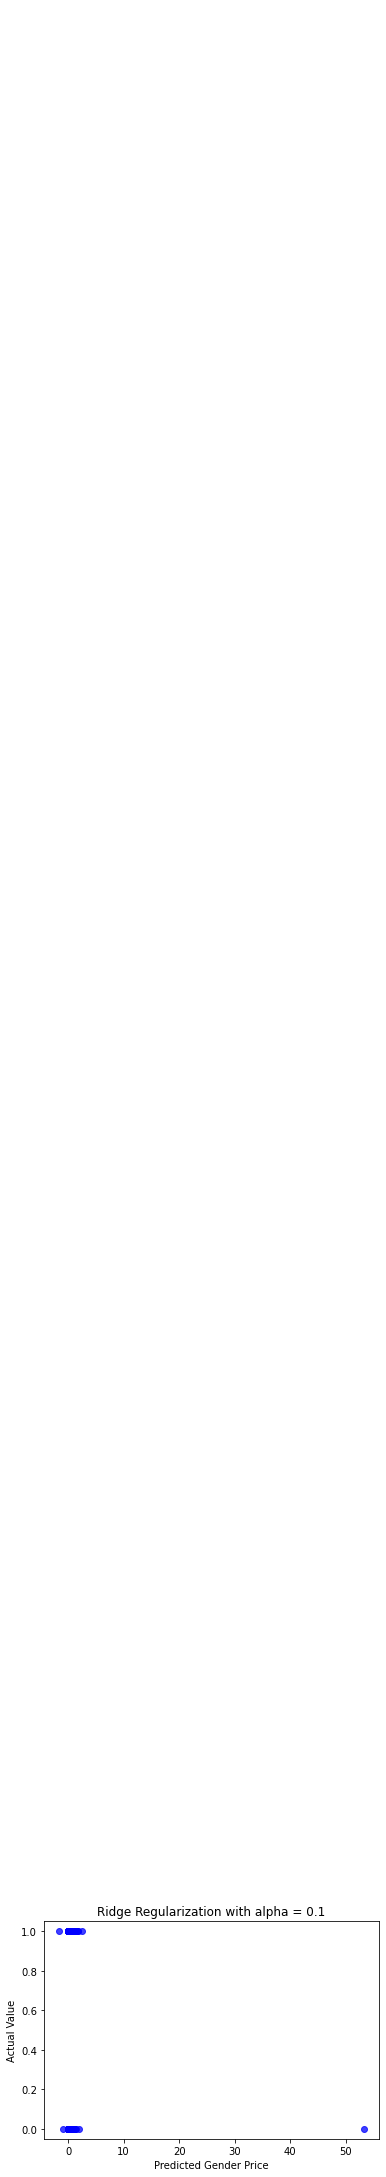

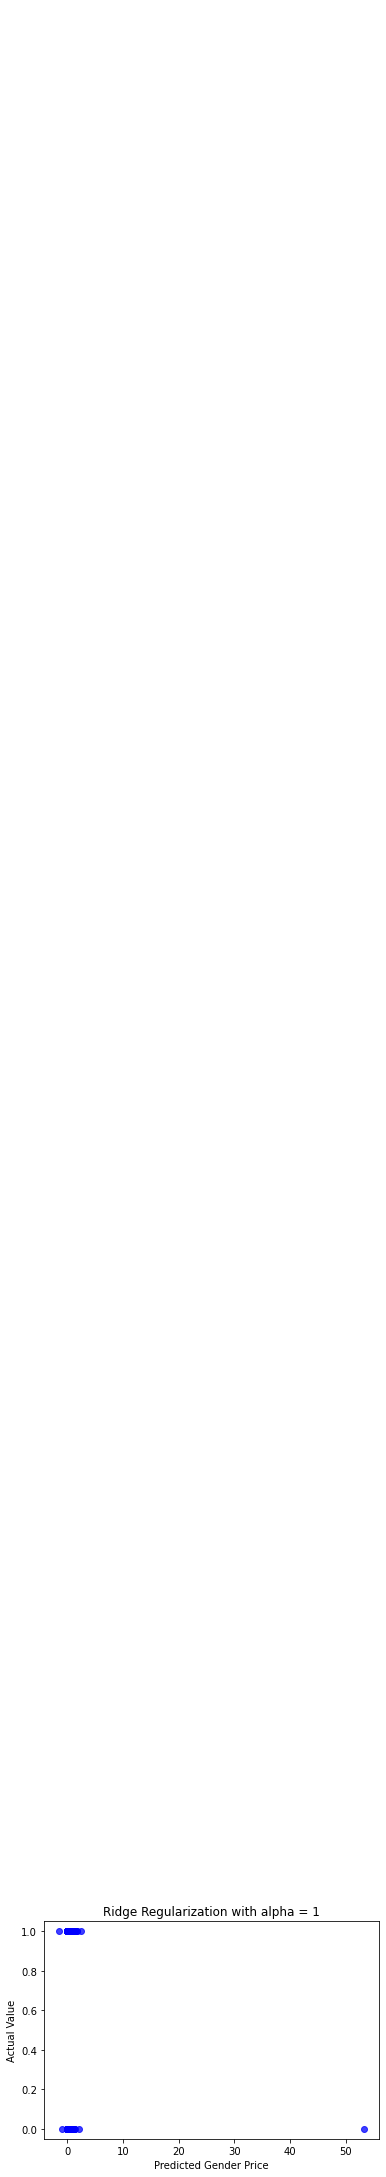

In [18]:
actual_values = y_test
from sklearn import linear_model
for i in range (-1, 1):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Gender Price')
    plt.ylabel('Actual Value')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [17]:
print("R^2 is: \n", ridge_model.score(X_test, y_test))
print('RMSE is: \n', mean_squared_error(y_test, preds_ridge))

R^2 is: 
 -0.09698445318260851
RMSE is: 
 0.24703031566631492


In [ ]:
Lasso GridSearchCV model

In [20]:
lasso = Lasso()
params = {"alpha" : [ 1e-3, 1e-2, 1, 1e1, 
                     1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

In [21]:
lasso_regressor = GridSearchCV(lasso, params, cv=5)

In [22]:
lasso_model=lasso_regressor.fit(X_train, y_train)


In [24]:
preds_lasso=lasso_model.predict(X_test)

In [25]:

print("R^2 is: \n", lasso_model.score(X_test, y_test))
print('RMSE is: \n', mean_squared_error(y_test, preds_lasso))

R^2 is: 
 -0.09602470353937753
RMSE is: 
 0.24681418930587282


In [26]:
lasso_regressor.best_estimator_


Lasso(alpha=0.001)